# AB-inBev Assignment
# E-Commerce

[Github Link](https://github.com/aa-ryan/AbinBev_Assignment) for Assignment. (This repo is currently private will be public when submission ends).

[Shareable colab link](https://colab.research.google.com/drive/1MJJEclQlrNTv2pNVJxIosmKXTCgSpbmf?usp=sharing)







## How to run this notebook

* Goto **Runtime** and select **Run All**
  - Will take almost 2-5 mins depending on your internet speed.
  - When execution is completed it show *0s completed* at the bottom.
* Now unhide all cells to see all output
  - Select **Edit** then **Select All Cells** option
  - It will select all cells as a result everything is now higlighted.
  - Select **View** and click on **Expand all sections**
* Now everything is done. (probably :P)


#### Extras:
* Using college email ID for colab, results in extra memory and better runtime
* If seeing third party cookies error, don't worry it's nothing, if you wish enable third party cookies for colab.
* Any other issues email me at (aryan.2023y@gmail.com)

### Task Done
* Convert the data files to csv.
* [x] Cleaning of Data
	- [x] Shape of Data
	- [x] Check for NAs
	- [x] Date format
	- [x] Check Data Info
* [x] Joining of tables, primary key as OrderID
* [x] Finding profit based on OrderID, States or other params.
* [x] Profit over a period (monthly)
* [x] Profit Trend Analysis by category, date.
* [x] Customer focusing
* [x] Analysis by heirarchy, Ex - Country, State, City
* [x] Amount vs category bar chart sales target
* [x] Which months they hit the sales target.
* [x] Amount vs Quantity
* [x] Correlation matrix for Order Details.

#### TODO:
* Documentation
* Code formatting
* Better way for Amount vs Quantity
* Physical notebook notes to markdown.
* Region wise sales distribution.

In [ ]:
!rm -r Data_ABinBev
!git clone https://github.com/aa-ryan/Data_ABinBev
## get the required dataset
## this repository contains only datasets and is public

Cloning into 'Data_ABinBev'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


#### Dependencies Installation.
(Not all dependencies needed if running in Colab Environment, most of the dependencies like pandas, matplotlib are already present)



In [ ]:
%pip install pandas
%pip install plotly
%pip install nbformat
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Ignoring pandas FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import calendar

#### Convert CSV to Pandas Dataframe

In [ ]:
list_of_orders = pd.read_csv("Data_ABinBev/list_of_orders.csv")
order_details = pd.read_csv("Data_ABinBev/order_details.csv")
sales_target = pd.read_csv("Data_ABinBev/sales_target.csv")

## Pre-processing and Data Cleansing
* [x] Check Shape of Data
* [x] Check NA values
* [x] Similar Date Format
* [x] Check Data *info*

#### Shape of Data

In [ ]:
print("Dimensions of List of Order -> ", list_of_orders.shape)
print("Dimensions of Order Detail -> ", order_details.shape)
print("Dimensions of Sales Target -> ", sales_target.shape)

Dimensions of List of Order ->  (500, 5)
Dimensions of Order Detail ->  (1500, 6)
Dimensions of Sales Target ->  (36, 3)


#### Check NA values
* None Found

In [ ]:
print("List of Orders DataFrame\n")
print(list_of_orders.isnull().sum(), end="\n\n")
print("Order Details DataFrame\n")
print(order_details.isnull().sum(), end='\n\n')
print("Sales Target DataFrame\n")
print(sales_target.isnull().sum(), end='\n\n')

List of Orders DataFrame

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

Order Details DataFrame

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

Sales Target DataFrame

Month of Order Date    0
Category               0
Target                 0
dtype: int64



#### Same format of Date
* YYYY-MM-DD

In [ ]:
list_of_orders['Order Date'] =  pd.to_datetime(list_of_orders['Order Date'], dayfirst=True)

#### Check Data info
* Focus on Dtype of Date

In [ ]:
print("List of Orders DataFrame\n")
print(list_of_orders.info(), end="\n\n")
print("Order Details DataFrame\n")
print(order_details.info(), end='\n\n')
print("Sales Target DataFrame\n")
print(sales_target.info(), end='\n\n')

List of Orders DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 19.7+ KB
None

Order Details DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-n

## Dataset Overview

In [ ]:
print("List of Orders DataFrame\n")
list_of_orders.head()

List of Orders DataFrame



,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata


In [ ]:
print("Order Details DataFrame\n")
order_details.head()

Order Details DataFrame



,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


In [ ]:
print("Sales Target DataFrame\n")
sales_target.head()

Sales Target DataFrame



,Month of Order Date,Category,Target
0,18-Apr,Furniture,10400
1,18-May,Furniture,10500
2,18-Jun,Furniture,10600
3,18-Jul,Furniture,10800
4,18-Aug,Furniture,10900


## Data Visualization

#### Analyzing Sales
* Changing the Category and Sub-Category variable to categorical data type in list_of_order df and sales_target df.

In [ ]:
order_details['Category'] = order_details['Category'].astype('category')
order_details['Sub-Category'] = order_details['Sub-Category'].astype('category')

sales_target['Category'] = sales_target['Category'].astype('category')
order_details.info()
sales_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Order ID      1500 non-null   object  
 1   Amount        1500 non-null   int64   
 2   Profit        1500 non-null   int64   
 3   Quantity      1500 non-null   int64   
 4   Category      1500 non-null   category
 5   Sub-Category  1500 non-null   category
dtypes: category(2), int64(3), object(1)
memory usage: 50.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month of Order Date  36 non-null     object  
 1   Category             36 non-null     category
 2   Target               36 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 872.0+ bytes


#### Making a dataframe having Amount, Profit, Quantity for different orders, joining it with list_of_order dataframe by taking OrderID as Primary Key.

In [ ]:
profits = order_details.groupby('Order ID',).sum().reset_index()
profits.head()

,Order ID,Amount,Profit,Quantity
0,B-25601,1429,-1218,19
1,B-25602,3889,975,22
2,B-25603,2025,-180,25
3,B-25604,222,22,11
4,B-25605,75,0,7


In [ ]:
merged_df = pd.merge(list_of_orders, profits, on='Order ID')
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1429,-1218,19
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune,3889,975,22
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal,2025,-180,25
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur,222,22,11
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata,75,0,7


#### Monthly Profit Analysis

In [ ]:
merged_df['Year'] = pd.DatetimeIndex(merged_df['Order Date']).year
merged_df['Month_Number'] = pd.DatetimeIndex(merged_df['Order Date']).month
merged_df['Month'] = merged_df['Month_Number'].apply(lambda x: calendar.month_abbr[x])

year_wiseDF = merged_df.groupby(['Year', 'Month','Month_Number']).sum().sort_values(['Year','Month_Number'])
year_wiseDF

Amount  Profit  Quantity
Year Month Month_Number                          
2018 Jan   1              18035   -3296       203
     Feb   2               6566     685        58
     Mar   3               7434     669       144
     Apr   4              26170   -1043       337
     May   5              20422    -891       306
     Jun   6              17406   -3759       353
     Jul   7              15682   -2065       239
     Aug   8              45269   -1059       601
     Sep   9              20210   -3509       310
     Oct   10             32758    5979       414
     Nov   11             38858    4955       433
     Dec   12             23892    1535       209
2019 Jan   1              50448    8655       640
     Feb   2              15894    2291       253
     Mar   3              39700    6633       485
     Apr   4              11079    1295       106
     May   5               4390     943        63
     Jun   6               3392     700        52
     Jul   7               5116     975        67
     Aug   8               6557     594        83
     Sep   9               5583    1597        70
     Oct   10             14147    1892       149
     Nov   11              2235     122        35
     Dec   12               259      57         5

In [ ]:
year_wiseDF = year_wiseDF.reset_index()
year_wiseDF["Color"] = np.where(year_wiseDF["Profit"]<0, 'Loss', 'Profit')

year_month_2018 = year_wiseDF[year_wiseDF['Year']==2018]
fig = px.bar(year_month_2018, x='Month_Number', y='Profit', color='Color',
             title="Monthly Profit in 2018",
             labels=dict(Month_Number="Month", Profit="Profit", Color="Legends"),
             color_discrete_map={
                 'Loss': '#EC2049',
                 'Profit': '#358701'},
             hover_data=["Month", "Profit"],
             template='plotly_white')

fig.update_layout(yaxis_tickprefix = '', yaxis_tickformat = ',.0f')

fig.update_layout(
    xaxis = dict(
        tickvals = [1, 2, 3, 4, 5, 6, 7,8 ,9, 10, 11, 12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
)
fig.show()

In [ ]:
year_month_2019 = year_wiseDF[year_wiseDF['Year'] == 2019]
fig = px.bar(year_month_2019, x='Month_Number', y='Profit', color='Color',
             title="Monthly Profit in 2019",
             labels=dict(Month_Number="Month", Profit="Profit", Color="Results"),
             color_discrete_map={
                 'Loss': '#EC2049',
                 'Profit': '#358701'},
             hover_data=["Month", "Profit"],
             template='plotly_white')

fig.update_layout(yaxis_tickprefix = '₹', yaxis_tickformat = ',.0f')

fig.update_layout(
    xaxis = dict(
        tickvals = [1, 2, 3, 4, 5, 6, 7,8 ,9, 10, 11, 12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
)
fig.show()

#### Alternative Analysis of Monthly Data

In [ ]:
date_orders = list_of_orders.groupby('Order Date').size().reset_index(name="Orders")
date_orders['Month'] = pd.DatetimeIndex(date_orders['Order Date']).month
date_orders['Year'] = pd.DatetimeIndex(date_orders['Order Date']).year

date_orders_2018 = date_orders[date_orders['Year']==2018]
date_orders_2019 = date_orders[date_orders['Year']==2019]

month_2018 = date_orders_2018.groupby('Month').sum().reset_index()
month_2019 = date_orders_2019.groupby('Month').sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    name='2018',
    x=month_2018['Month'],
    y=month_2018['Orders'],
    connectgaps=True 
))
fig.add_trace(go.Scatter(
    name='2019',
    x=month_2019['Month'],
    y=month_2019['Orders'],
    connectgaps=True 
))
fig.update_layout(title_text='Monthly Quantity Sold',
                 template='plotly_dark')
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Orders')
fig.update_layout(
    xaxis = dict(
        tickvals = [1, 2, 3, 4, 5, 6, 7,8 ,9, 10, 11, 12],
        ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    )
)

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()

### State wise sales analysis

In [ ]:
state_wise_cat_df = pd.merge(order_details, list_of_orders, on='Order ID', how='left')
state_wise_cat_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275,-1148,7,Furniture,Bookcases,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25601,66,-12,5,Clothing,Stole,2018-01-04,Bharat,Gujarat,Ahmedabad
2,B-25601,8,-2,3,Clothing,Hankerchief,2018-01-04,Bharat,Gujarat,Ahmedabad
3,B-25601,80,-56,4,Electronics,Electronic Games,2018-01-04,Bharat,Gujarat,Ahmedabad
4,B-25602,168,-111,2,Electronics,Phones,2018-01-04,Pearl,Maharashtra,Pune


In [ ]:
px.histogram(state_wise_cat_df, x='State', color='Category', text_auto=True)
# y - axis count of orders not to be confused with quantity.
# x - axis states

#### Total number of order by States.

In [ ]:
total_order_df = state_wise_cat_df.groupby(['State'])['Category'].count().reset_index()
total_order_df

,State,Category
0,Andhra Pradesh,42
1,Bihar,62
2,Delhi,74
3,Goa,43
4,Gujarat,87
5,Haryana,26
6,Himachal Pradesh,29
7,Jammu and Kashmir,49
8,Karnataka,54
9,Kerala,45


#### Top 10 States with most number of orders

In [ ]:

top_state_df = total_order_df.sort_values(by='Category', ascending=False).head(10)
top_fig = px.bar(top_state_df, x='State', y='Category', color='State', barmode='relative', hover_data=['State'])
top_fig.show()

#### Profit by State

In [ ]:
profit_by_state = merged_df.groupby('State').sum().reset_index().sort_values(['Profit'])
profit_by_state["Color"] = np.where(profit_by_state["Profit"]<0, 'Loss', 'Profit')


fig = px.bar(profit_by_state, x='State', y='Profit',
             color='Color', color_discrete_map={
                 'Loss': '#EC2049',
                 'Profit': '#358701'},
             title="Profit by State",
             labels=dict(Color="Results"),
             template='plotly_white')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.update_layout(yaxis_tickprefix = '₹', yaxis_tickformat = ',.2f')

fig.update_xaxes(
        tickangle = -90,
        title_text = "States",
)


fig.show()

#### City Wise Analysis

In [ ]:
px.histogram(state_wise_cat_df, x='City', color='Category', text_auto=True)


#### Total Number of Orders by Cities

In [ ]:
total_order_city_df = state_wise_cat_df.groupby(['City'])['Category'].count().reset_index()
total_order_city_df

,City,Category
0,Ahmedabad,62
1,Allahabad,30
2,Amritsar,15
3,Bangalore,54
4,Bhopal,66
5,Chandigarh,71
6,Chennai,25
7,Delhi,81
8,Gangtok,24
9,Goa,43


#### Top 10 City with most sales

In [ ]:
top_city_df = total_order_city_df.sort_values(by='Category', ascending=False).head(10)
top_fig = px.bar(top_city_df, x='City', y='Category', color='City', barmode='relative', hover_data=['City'])
top_fig.show()

#### Profit by city

In [ ]:
profit_by_city = merged_df.groupby('City').sum().reset_index().sort_values(['Profit'])
profit_by_city["Color"] = np.where(profit_by_city["Profit"]<0, 'Loss', 'Profit')


fig = px.bar(profit_by_city, x='City', y='Profit',
             color='Color', color_discrete_map={
                 'Loss': '#EC2049',
                 'Profit': '#358701'},
             title="Profit by City",
             labels=dict(Color="Results"),
             template='plotly_white')

fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.update_layout(yaxis_tickprefix = '₹', yaxis_tickformat = ',.0f')

fig.update_xaxes(
        tickangle = -90,
        title_text = "Cities",
)


fig.show()





## Analysis based on Category

In [ ]:
category = order_details.groupby('Category').sum().reset_index()
fig = px.pie(category, values='Quantity', names='Category', color='Category',
             color_discrete_map={'Clothing':'cyan',
                                 'Electronics':'royalblue',
                                 'Furniture':'darkblue'},
            title='Total Quantity Sold per Category')
fig.show()

In [ ]:
subcategory = order_details.groupby('Sub-Category').sum().reset_index()
fig = px.pie(subcategory, values='Quantity', names='Sub-Category', color='Sub-Category',
            title='Total Quantity Sold per Sub-Category')
fig.show()

#### Profitable and Non-Profitable Categories

In [ ]:
profit_orders = order_details.merge(list_of_orders[['Order ID','Order Date']], left_on='Order ID',right_on='Order ID', how='inner')
profit_orders.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date
0,B-25601,1275,-1148,7,Furniture,Bookcases,2018-01-04
1,B-25601,66,-12,5,Clothing,Stole,2018-01-04
2,B-25601,8,-2,3,Clothing,Hankerchief,2018-01-04
3,B-25601,80,-56,4,Electronics,Electronic Games,2018-01-04
4,B-25602,168,-111,2,Electronics,Phones,2018-01-04


In [ ]:
import copy
copy_profit_orders = copy.deepcopy(profit_orders)

Creating row with month and year of order

In [ ]:
copy_profit_orders['Date'] = copy_profit_orders['Order Date'].dt.strftime('%Y-%m')
copy_profit_orders

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,Date
0,B-25601,1275,-1148,7,Furniture,Bookcases,2018-01-04,2018-01
1,B-25601,66,-12,5,Clothing,Stole,2018-01-04,2018-01
2,B-25601,8,-2,3,Clothing,Hankerchief,2018-01-04,2018-01
3,B-25601,80,-56,4,Electronics,Electronic Games,2018-01-04,2018-01
4,B-25602,168,-111,2,Electronics,Phones,2018-01-04,2018-01
...,...,...,...,...,...,...,...,...
1495,B-26099,835,267,5,Electronics,Phones,2019-03-30,2019-03
1496,B-26099,2366,552,5,Clothing,Trousers,2019-03-30,2019-03
1497,B-26100,828,230,2,Furniture,Chairs,2019-03-31,2019-03
1498,B-26100,34,10,2,Clothing,T-shirt,2019-03-31,2019-03


In [ ]:
sub_order = copy_profit_orders.groupby(['Sub-Category', 'Date']).Profit.sum().unstack().reset_index()
sub_order.head()

Date,Sub-Category,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,Accessories,-66,-2,30,76,-531,-60,30,18,235,...,465,81,382,27,88,170,944,61,0,0
1,Bookcases,-3129,293,0,289,-15,71,-239,649,334,...,49,469,352,0,269,0,222,238,10,0
2,Chairs,-21,-280,-86,-373,-231,-667,-195,848,-456,...,413,457,0,93,0,-8,1,64,0,0
3,Electronic Games,-159,213,44,-957,-894,-714,-78,-377,26,...,-348,99,-16,0,102,73,0,174,-10,0
4,Furnishings,13,21,92,-98,-169,-17,-160,206,-228,...,395,30,41,0,17,54,0,0,-13,0


In [ ]:
sub_order['Profit Summary'] = sub_order.iloc[:, 1:14].sum(axis = 1)
sub_order

Date,Sub-Category,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,Profit Summary
0,Accessories,-66,-2,30,76,-531,-60,30,18,235,...,81,382,27,88,170,944,61,0,0,851
1,Bookcases,-3129,293,0,289,-15,71,-239,649,334,...,469,352,0,269,0,222,238,10,0,2264
2,Chairs,-21,-280,-86,-373,-231,-667,-195,848,-456,...,457,0,93,0,-8,1,64,0,0,-366
3,Electronic Games,-159,213,44,-957,-894,-714,-78,-377,26,...,99,-16,0,102,73,0,174,-10,0,-1373
4,Furnishings,13,21,92,-98,-169,-17,-160,206,-228,...,30,41,0,17,54,0,0,-13,0,138
5,Hankerchief,-40,61,89,-121,21,-301,1,314,-19,...,58,102,47,24,47,96,171,99,0,1109
6,Kurti,0,0,104,-54,73,-37,33,-119,-45,...,0,0,0,0,51,0,-18,0,0,89
7,Leggings,-16,0,7,28,17,2,-42,-34,-8,...,0,0,0,0,0,24,0,0,0,70
8,Phones,515,-87,-46,-418,-26,-155,-1957,-342,0,...,50,11,143,0,0,0,204,0,7,1913
9,Printers,340,476,596,9,741,-165,408,-477,-1076,...,0,0,243,147,-23,0,462,0,0,3475


#### Sub-Category that causes loss

In [ ]:
sub_order.loc[sub_order['Profit Summary'] < 0]['Sub-Category'].unique()

['Chairs', 'Electronic Games', 'Saree', 'Tables']
Categories (17, object): ['Accessories', 'Bookcases', 'Chairs', 'Electronic Games', ..., 'Stole',
                          'T-shirt', 'Tables', 'Trousers']

In [ ]:
fig = go.Figure(data=[go.Bar(x=sub_order[sub_order['Profit Summary'] < 0]['Sub-Category'], y=sub_order[sub_order['Profit Summary'] < 0]['Profit Summary'])])

fig.update_traces(marker_color='rgb(255,0,17)', marker_line_color='rgb(173,0,0)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Non profitable sub-categories: Loss')
fig.show()

In [ ]:
sub_order[sub_order['Profit Summary'] < 0]

Date,Sub-Category,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,Profit Summary
2,Chairs,-21,-280,-86,-373,-231,-667,-195,848,-456,...,457,0,93,0,-8,1,64,0,0,-366
3,Electronic Games,-159,213,44,-957,-894,-714,-78,-377,26,...,99,-16,0,102,73,0,174,-10,0,-1373
10,Saree,110,-10,-174,-190,-169,-1227,-246,-564,-707,...,-475,-8,87,119,15,222,230,3,0,-822
15,Tables,-187,0,0,0,-66,-317,242,-1864,-994,...,202,0,0,0,122,0,0,0,0,-4640


In [ ]:
# Drop Sub-categories making loss
sub_order = sub_order.loc[sub_order['Profit Summary'] > 0]
sub_order = sub_order.reset_index(drop=True)

Creating new columns of profit share showing contribution of category for profits and cumulative share is total cumlative.

In [ ]:
sub_order['Profit share'] = sub_order['Profit Summary'] / sub_order['Profit Summary'].values.sum()*100
sub_order = sub_order.sort_values('Profit share', ascending = False)
sub_order['Cumulative share'] = sub_order['Profit share'].cumsum()
sub_order

Date,Sub-Category,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,Profit Summary,Profit share,Cumulative share
7,Printers,340,476,596,9,741,-165,408,-477,-1076,...,243,147,-23,0,462,0,0,3475,24.720780,24.720780
1,Bookcases,-3129,293,0,289,-15,71,-239,649,334,...,0,269,0,222,238,10,0,2264,16.105855,40.826634
6,Phones,515,-87,-46,-418,-26,-155,-1957,-342,0,...,143,0,0,0,204,0,7,1913,13.608878,54.435513
10,Stole,-199,0,69,167,66,-110,-32,129,-221,...,13,72,39,81,142,3,44,1534,10.912713,65.348225
12,Trousers,-514,0,-55,484,139,72,58,444,-372,...,0,0,0,0,87,0,0,1279,9.098670,74.446895
3,Hankerchief,-40,61,89,-121,21,-301,1,314,-19,...,47,24,47,96,171,99,0,1109,7.889308,82.336203
0,Accessories,-66,-2,30,76,-531,-60,30,18,235,...,27,88,170,944,61,0,0,851,6.053923,88.390126
11,T-shirt,-2,0,28,-9,153,107,-5,100,43,...,32,85,51,0,35,3,6,780,5.548837,93.938963
8,Shirt,48,0,-25,109,0,-227,147,20,-9,...,6,41,1,0,42,27,0,417,2.966494,96.905456
2,Furnishings,13,21,92,-98,-169,-17,-160,206,-228,...,0,17,54,0,0,-13,0,138,0.981717,97.887174


In [ ]:
fig = px.bar(sub_order, y='Profit Summary', x='Sub-Category', title='Profit by sub-category', color='Cumulative share')
fig.show()

In [ ]:
fig = go.Figure()
for i in range(sub_order['Sub-Category'].nunique()):
    x = sub_order.iloc[:, 1:13].columns
    fig.add_trace(go.Scatter(x = x, y = sub_order.iloc[i, 1:13], mode = 'lines+markers', name = sub_order['Sub-Category'].unique()[i]))
    i+=1  
fig.update_layout(title = 'Monthly Sub-categories sales')
fig.show()

## Customer Analysis



#### Customer who spent the most amount

In [ ]:
## Total amt spent by each consumer
cus_amt = merged_df.groupby([
    'CustomerName',
    'State'
])['Amount'].sum().reset_index()
### sort to get who spent most, get top 10

sorted_cus_amt = cus_amt.sort_values(by='Amount', ascending=False).head(10)

#### Plotting customer based on amount top 10

In [ ]:
fig = px.bar(sorted_cus_amt, x = "CustomerName", y = "Amount", color="CustomerName", barmode="relative", hover_data=['State'])
fig.show()

#### Customer with more Orders
* Even the max amount is spent by Yaanvi, Abhishek is the one whose order count is most.

In [ ]:
top_customers = merged_df.groupby('CustomerName').sum().reset_index() \
                         .sort_values(['Quantity'], ascending=False).head(5)

fig = go.Figure(data=[go.Bar(
    x=top_customers['CustomerName'],
    y=top_customers['Quantity'],
)])
fig.update_layout(title_text='Top 5 Customers', 
                  template='plotly_white')
fig.update_xaxes(title_text='Customers')
fig.update_yaxes(title_text='Total Orders')

fig.show()

## Sales Target Analysis


In [ ]:
target = sales_target.groupby('Category').max().reset_index()
details = order_details.groupby('Category').sum().reset_index()

target['Actual_Amount'] = details['Profit']

fig = go.Figure(data=[
    go.Bar(name='Target', x=target['Category'], y=target['Target'],
          marker_color='green'),
    go.Bar(name='Actual Amount', x=target['Category'], y=target['Actual_Amount'],
          marker_color='red')
])

fig.update_layout(title_text='Actual Sales vs Target Sales',
                 template='plotly_white')

fig.update_xaxes(title_text='Categories')
fig.update_yaxes(title_text='Amount')

fig.update_layout(yaxis_tickprefix = '₹', yaxis_tickformat = ',.0f')


fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()

## Correlation Matrix of Details of Amount, Profit, Quantity

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

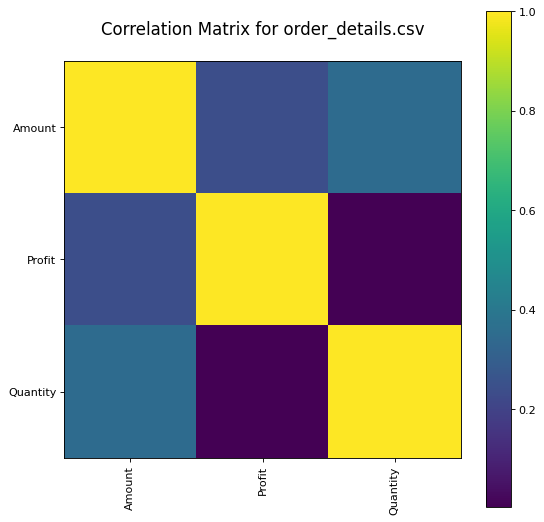

In [ ]:
order_details.dataframeName = "order_details.csv"
plotCorrelationMatrix(order_details, 8)

## Customer Segmentation using Clusters

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
segment_customer = merged_df.groupby('CustomerName').sum().reset_index()
segment_customer = segment_customer[['CustomerName', 'Amount', 'Quantity']]
segment_customer.head()


,CustomerName,Amount,Quantity
0,Aakanksha,74,8
1,Aarushi,4701,49
2,Aashna,1931,32
3,Aastha,3276,28
4,Aayush,556,18


In [ ]:
# Follow documentation

segment_copy_customer = segment_customer[['Amount', 'Quantity']]
scaler = StandardScaler()
scaler.fit(segment_copy_customer)

customers_normalizedDF = scaler.transform(segment_copy_customer)
customers_normalizedDF

# Elbow Method to find best number of clusters GFG zindabad
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalizedDF)
    sse[k] = kmeans.inertia_ # SSE -> sum of square error to closest cluster centroid

# Plotting SSE
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(sse.keys()),
    y=list(sse.values()),
    connectgaps=True # override default to connect the gaps
))    

fig.update_layout(title_text='The Elbow Method',
                 template='plotly_white')
fig.update_xaxes(title_text='k')
fig.update_yaxes(title_text='SSE')
fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True
    
fig.show()


Due to linear trend k-value as 3 is suitable hyperparameter

In [ ]:
model = KMeans(n_clusters=3)
model.fit(customers_normalizedDF)
segment_customer['Cluster'] = model.labels_ + 1
segment_customer['Cluster'] = segment_customer['Cluster'].astype('category')
segment_customer.head()

,CustomerName,Amount,Quantity,Cluster
0,Aakanksha,74,8,1
1,Aarushi,4701,49,2
2,Aashna,1931,32,3
3,Aastha,3276,28,3
4,Aayush,556,18,1


In [ ]:
segment_customer.groupby('Cluster').agg ({
    'Amount':'mean',
    'Quantity':'count'
}).round(2)

,Amount,Quantity
Cluster,,
1,451.36,208
2,5237.32,28
3,1989.32,96


#### Cost vs Quantity Scatter Plot

In [ ]:
fig = px.scatter(segment_customer, x="Quantity", y="Amount",
                 color="Cluster",
                 template='plotly_white',
                 title="Cost vs Quantity - Customer Segmentation")
fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()